In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

# Decision Tree Classification

In [2]:
# data
## sample data

data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]
}

In [3]:
data = pd.DataFrame(data)

In [4]:
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


In [6]:
# decision tree 구현
## 변수 값에 따라 데이터를 정렬

sorted_data = data.sort_values(by="value")
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [8]:
sorted_data = sorted_data.reset_index(drop=True) #INDEX 초기화
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


In [9]:
# 정답이 바뀌는 경계지점을 찾기
boundary = sorted_data["label"].diff() != 0
boundary

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [11]:
boundary[0] = False
boundary

0    False
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [12]:
boundary_idx = boundary.loc[boundary].index
boundary_idx

Int64Index([2, 4], dtype='int64')

In [13]:
# 경계의 평균값을 기준으로 잡음

## 첫번째 경계구간
idx_1 = boundary_idx[0]
data.loc[[idx_1-1, idx_1]]

bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()
bound_value_1

135.0

In [14]:
## 두번째 경계구간
idx_2 = boundary_idx[1]
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()
bound_value_2

395.0

In [16]:
## 구간별 경계값을 기준으로 정보 이득 계산

def gini_index(label):
    p1 = (label == 0).mean()
    p2 = 1 - p1
    return 1 - (p1 ** 2 + p2 **2)

def concat_gini_index(left, right):
    left_gini = gini_index(left)
    right_gini = gini_index(right)
    all_num = len(left) + len(right)
    left_gini *= len(left) / all_num
    right_gini *= len(right) / all_num
    return left_gini + right_gini

# 135를 경계로 나뉠때
left_1 = sorted_data.loc[:idx_1 - 1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

In [21]:
print(left_1)
print(gini_index(right_1))
print(concat_gini_index(left_1, right_1))

0    0
1    0
Name: label, dtype: int64
0.48
0.34285714285714286


In [22]:
# Decision Tree Package

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data["value"].to_frame(), data["label"])


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

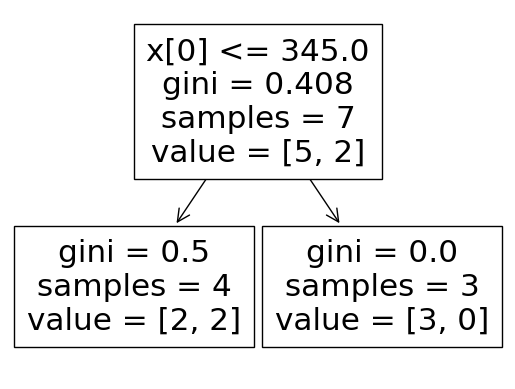

In [23]:
plot_tree(tree)

# Decision Tree Regressor

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [25]:
# data load
data = np.sort(np.random.uniform(low=0, high=5, size=(80, 1)))
label = np.sin(data).ravel()
label[::5] += 3 * (0.5 - np.random.uniform(0, 1, 16))


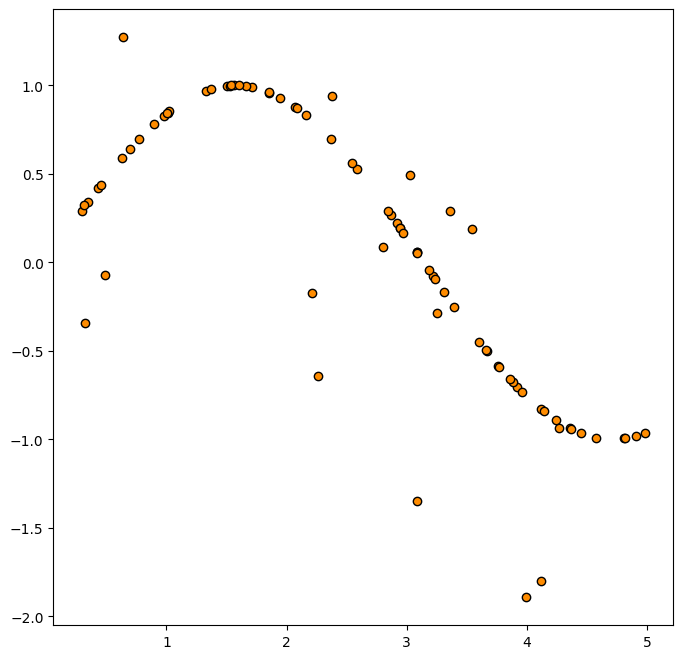

In [26]:
# 데이터 그래프
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")

In [27]:
# Viz data : 시각화를 위한 데이터 생성
viz_test_data = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
viz_test_data[:5]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04]])

In [28]:
# Decion Tree Regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

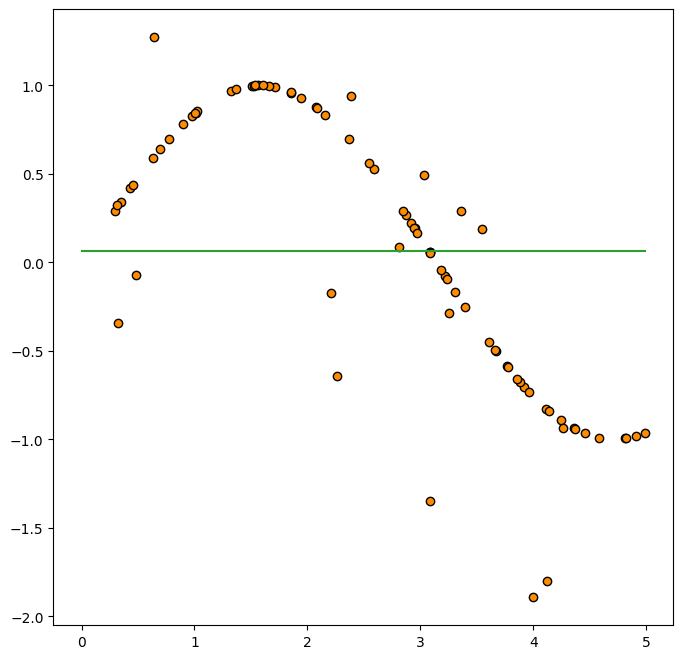

In [30]:
# 분할이 없을 경우
#학습 데이터의 평균으로 예측

viz_test_pred = np.repeat(label.mean(), len(viz_test_data))

# 플롯으로 확인
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, viz_test_pred, color="C2")

In [31]:
# 분산 = 0.580 의 값을 얻음

train_pred = np.repeat(label.mean(), len(data))
mse_var = np.var(label - train_pred)

print(f"no divide mse variance: {mse_var:.3f}")

no divide mse variance: 0.580


In [32]:
# 첫번재 분할
first_divide = DecisionTreeRegressor(max_depth=1)
first_divide.fit(data, label)

DecisionTreeRegressor(max_depth=1)

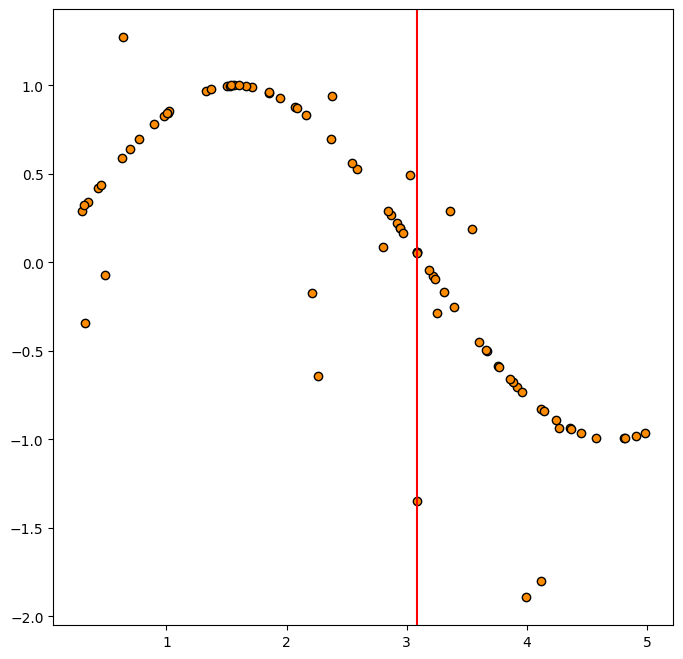

In [33]:
first_divide_pred = first_divide.predict(viz_test_data)

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")

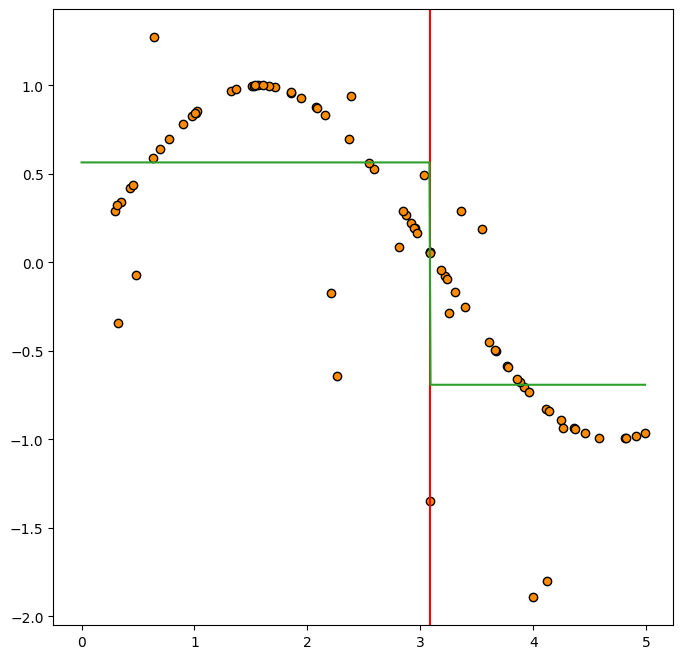

In [34]:
# 분할로 이루어진 각 영역에서 다시 평균 계산
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, first_divide_pred, color="C2")

[Text(0.5, 0.75, 'x[0] <= 3.088\nsquared_error = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(0.25, 0.25, 'squared_error = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(0.75, 0.25, 'squared_error = 0.236\nsamples = 32\nvalue = -0.691')]

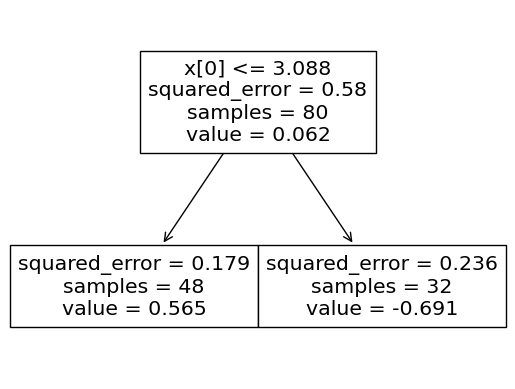

In [35]:
# Tree 시각화
plot_tree(first_divide)

In [36]:
# 두번재 분할
second_divide = DecisionTreeRegressor(max_depth=2)
second_divide.fit(data, label)

DecisionTreeRegressor(max_depth=2)

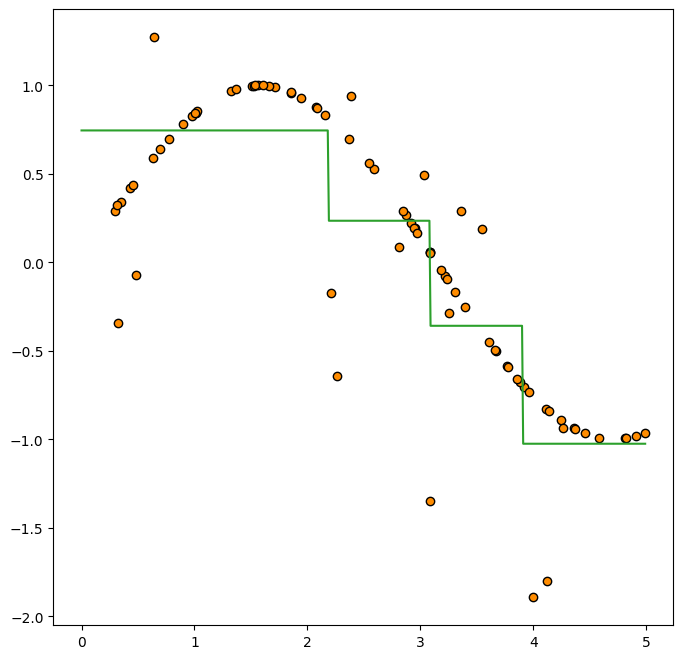

In [37]:
second_divide_pred = second_divide.predict(viz_test_data)

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, second_divide_pred, color="C2")


[Text(0.5, 0.8333333333333334, 'x[0] <= 3.088\nsquared_error = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(0.25, 0.5, 'x[0] <= 2.185\nsquared_error = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.119\nsamples = 31\nvalue = 0.745'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.12\nsamples = 17\nvalue = 0.235'),
 Text(0.75, 0.5, 'x[0] <= 3.903\nsquared_error = 0.236\nsamples = 32\nvalue = -0.691'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.147\nsamples = 16\nvalue = -0.358'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.104\nsamples = 16\nvalue = -1.025')]

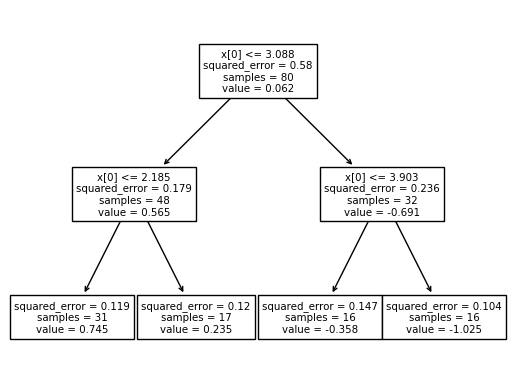

In [38]:
plot_tree(second_divide)

In [39]:
# Depth에 따른 변화

shallow_depth_tree = DecisionTreeRegressor(max_depth=2)
deep_depth_tree = DecisionTreeRegressor(max_depth=5)

shallow_depth_tree.fit(data, label)
deep_depth_tree.fit(data, label)

DecisionTreeRegressor(max_depth=5)

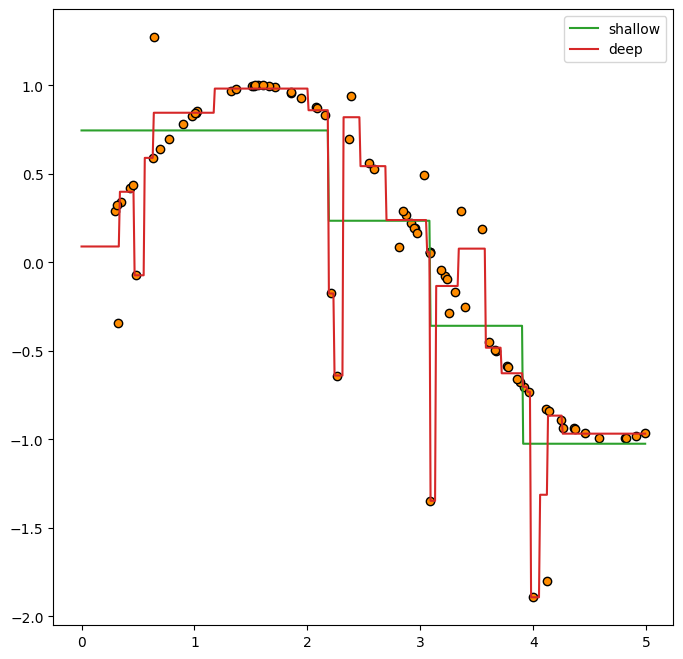

In [40]:
shallow_pred = shallow_depth_tree.predict(viz_test_data)
deep_pred = deep_depth_tree.predict(viz_test_data)

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, shallow_pred, color="C2", label="shallow")
plt.plot(viz_test_data, deep_pred, color="C3", label="deep")
plt.legend()

# 실습하기

## Iris 꽃 종류 분류


In [41]:
# setting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [42]:
# data
## data load

from sklearn.datasets import load_iris

iris = load_iris()


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
### 변수명 확인
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
# iris 꽃의 종류
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
data, target = iris["data"], iris["target"]

In [47]:
## data EDA
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
## data split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target
)

print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


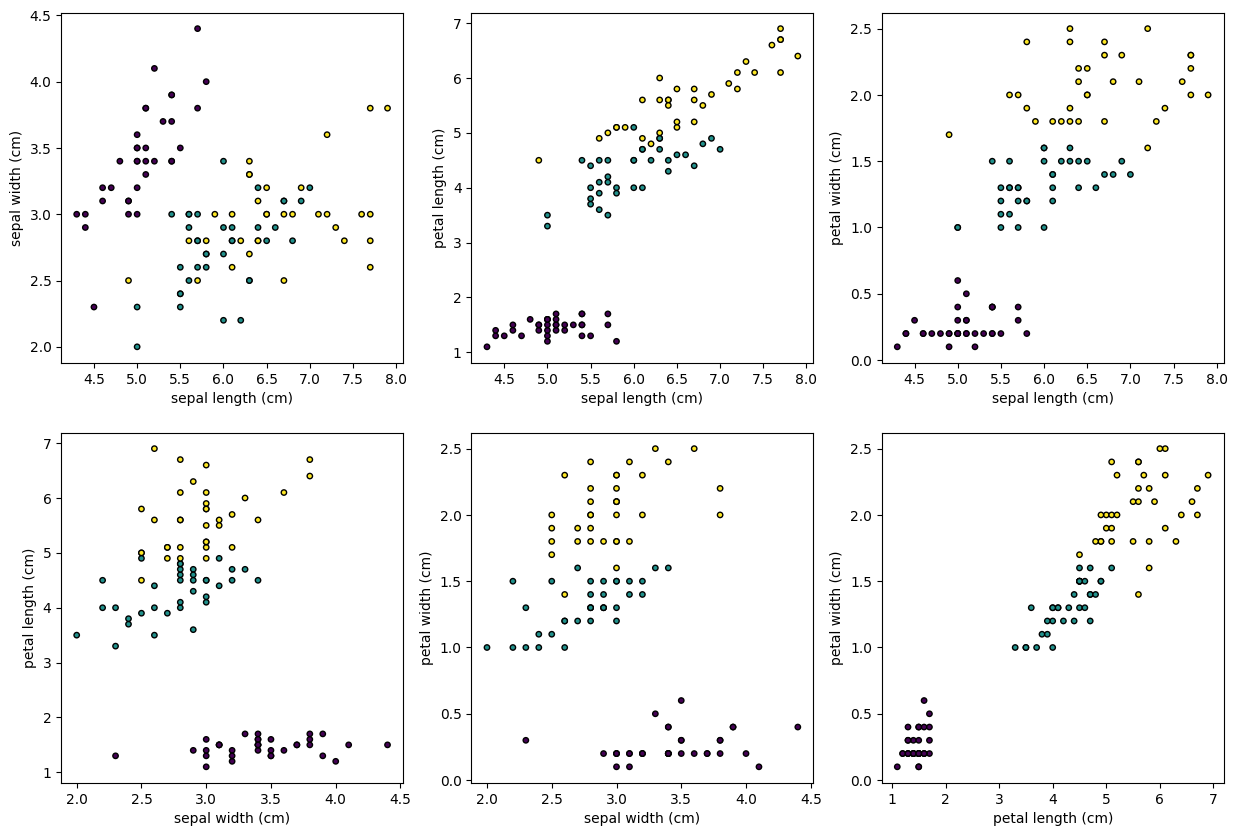

In [50]:
## Visualization
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    ax = axes[idx//3, idx%3]
    ax.scatter(
        x=train_data[:, x], y=train_data[:, y], c=train_target, edgecolor='black', s=15
    )
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])

In [51]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

gini_tree = DecisionTreeClassifier()

In [52]:
## 학습
gini_tree.fit(train_data, train_target)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.375, 'petal length (cm) <= 5.35\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

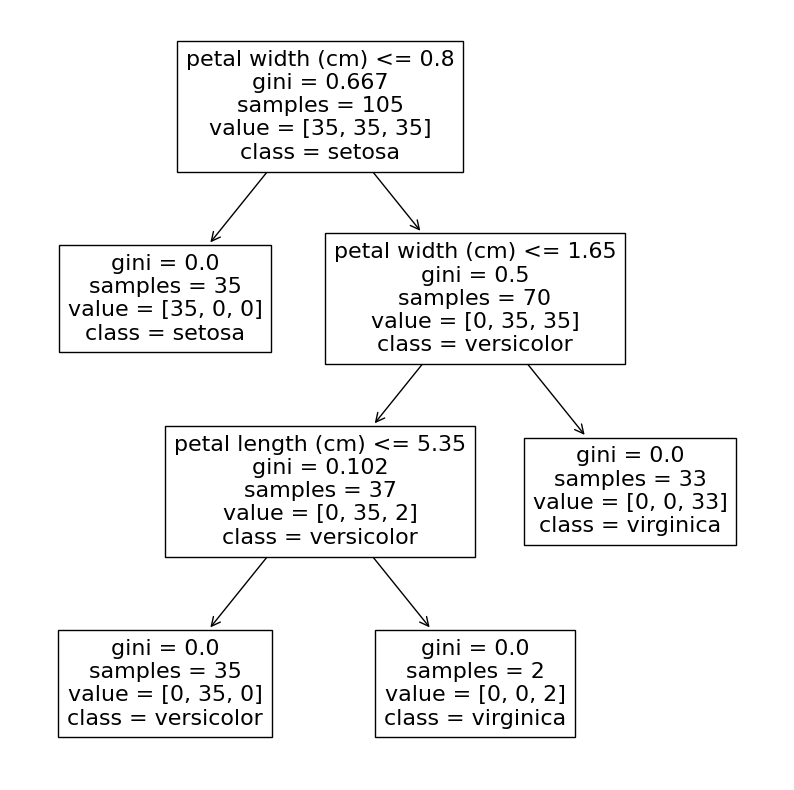

In [53]:
plt.figure(figsize=(10,10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

[Text(0.5, 0.75, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor')]

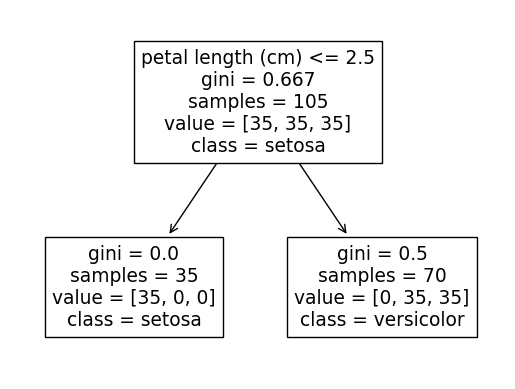

In [54]:
# Arguments
## max depth
depth_1_tree = DecisionTreeClassifier(max_depth=1)
depth_1_tree.fit(train_data, train_target)

plot_tree(depth_1_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

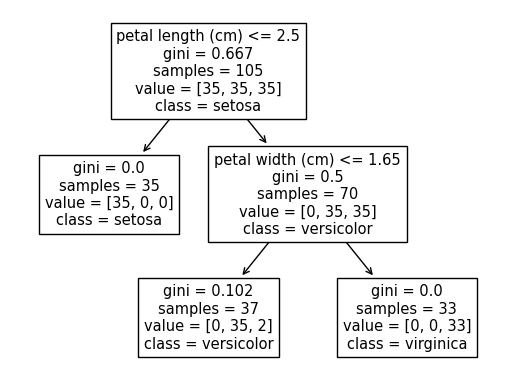

In [55]:
## min_samples_split
sample_50_tree = DecisionTreeClassifier(min_samples_split=50)
sample_50_tree.fit(train_data, train_target)

plot_tree(sample_50_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

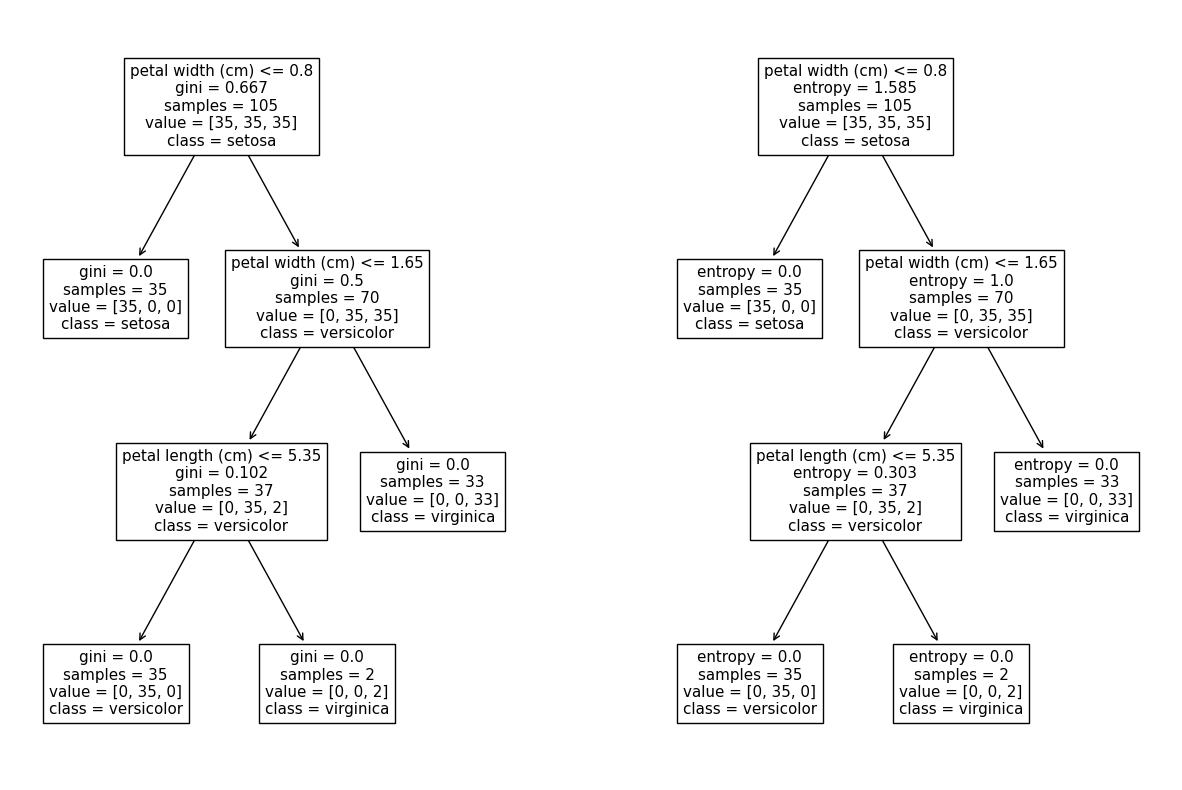

In [57]:
## criterion
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[0])
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[1])
plt.show()

In [60]:
## Predict
trees = [
    ("gini tree", gini_tree),
    ("entropy tree", entropy_tree),
    ("depth=1 tree", depth_1_tree),
    ("sample=50 tree" ,sample_50_tree),
]

train_preds = []
test_preds = []
for tree_name, tree in trees:
    train_pred = tree.predict(train_data)
    test_pred =  tree.predict(test_data)
    train_preds += [train_pred]
    test_preds += [test_pred]

train_preds

[array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2,
        1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1]),
 array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2,
        1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1]),
 array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [61]:
## 평가하기
from sklearn.metrics import accuracy_score

for idx, (tree_name, tree) in enumerate(trees):
    train_acc = accuracy_score(train_target, train_preds[idx])
    test_acc =  accuracy_score(test_target, test_preds[idx])
    print(tree_name)
    print("\t", f"train accuracy is {train_acc:.2f}")
    print("\t", f"test accuracy is {test_acc:.2f}")

gini tree
	 train accuracy is 1.00
	 test accuracy is 0.91
entropy tree
	 train accuracy is 1.00
	 test accuracy is 0.91
depth=1 tree
	 train accuracy is 0.67
	 test accuracy is 0.67
sample=50 tree
	 train accuracy is 0.98
	 test accuracy is 0.91


In [62]:
# Feature Importance
gini_tree.feature_importances_


array([0.        , 0.        , 0.05405405, 0.94594595])

sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.054054
petal width (cm)     0.945946
dtype: float64


<Axes: title={'center': 'gini tree feature importance'}>

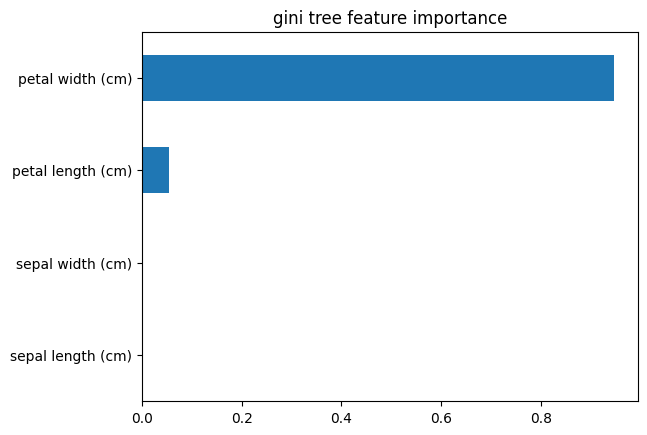

In [66]:
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index=iris["feature_names"])

print(gini_feature_importance)
gini_feature_importance.plot(kind="barh", title="gini tree feature importance")

<Axes: title={'center': 'sample=50 tree feature importance'}>

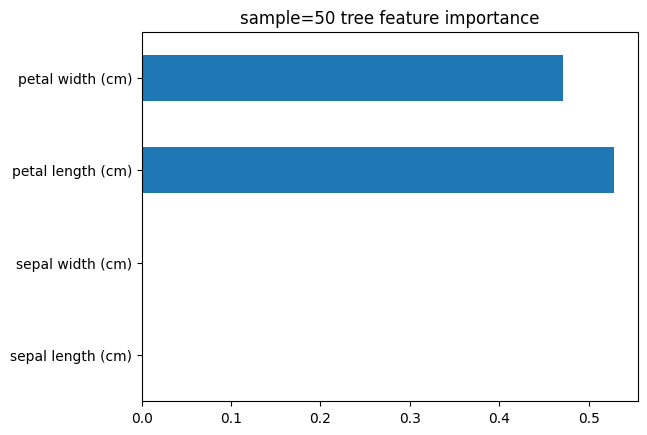

In [68]:
sample_50_feature_importance = pd.Series(
    sample_50_tree.feature_importances_,
    index=iris["feature_names"]
)

sample_50_feature_importance.plot(kind="barh", title="sample=50 tree feature importance")

<ipython-input-69-98b1b1ec6e8c>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-69-98b1b1ec6e8c>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-69-98b1b1ec6e8c>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-69-98b1b1ec6e8c>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-69-98b1b1ec6e8c>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.s

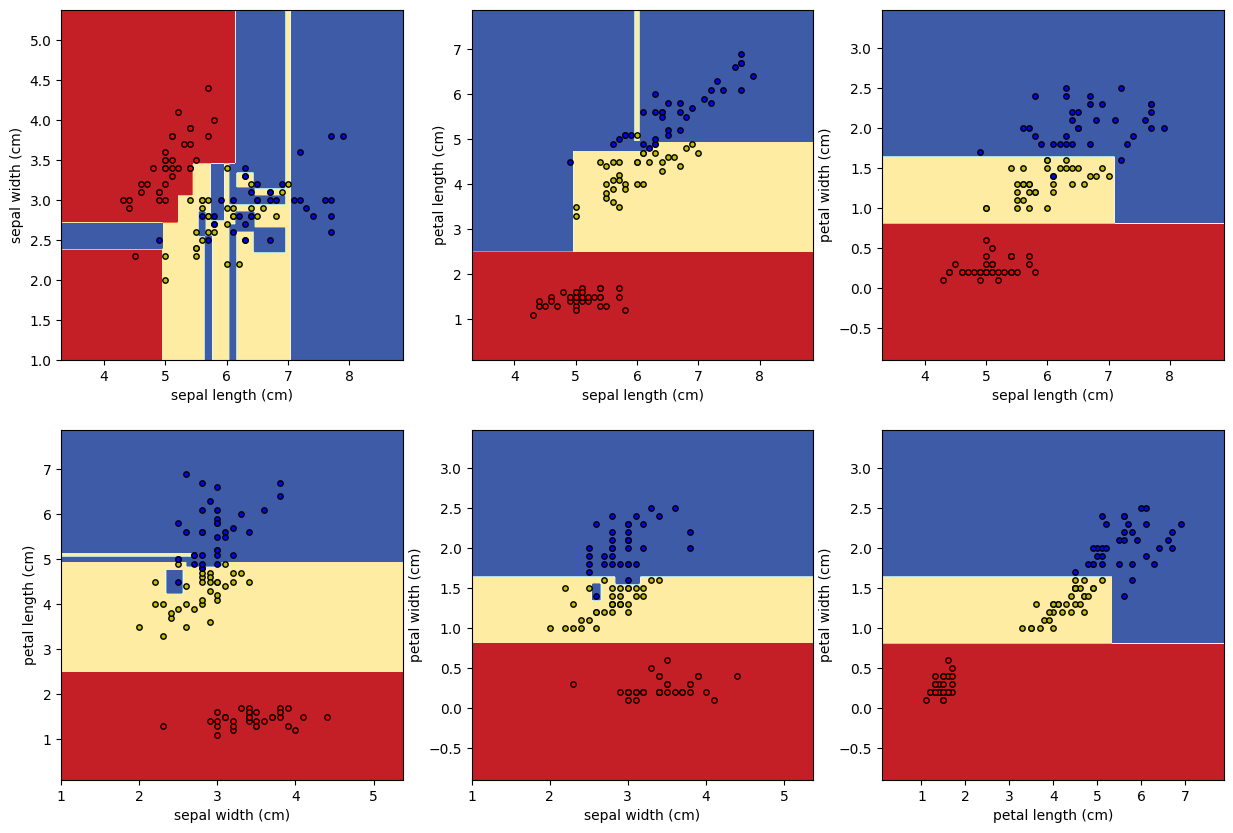

In [69]:
# 시각화
def plot_decision_boundary(pair_data, pair_tree, ax):
    x_min, x_max = pair_data[:, 0].min() - 1, pair_data[:, 0].max() + 1
    y_min, y_max = pair_data[:, 1].min() - 1, pair_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(train_target == i)
        ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    return ax


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    pair_data = train_data[:, pair]
    pair_tree = DecisionTreeClassifier().fit(pair_data, train_target)

    ax = axes[idx//3, idx%3]
    ax = plot_decision_boundary(pair_data, pair_tree, ax)
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])